# PyTorch Workflow


In [261]:
print("Python end to end workflow ")

Python end to end workflow 


In [262]:
what_were_covering = {
    1: "Data (load and prepare)",
    2: "Build Model",
    3: "Fitting the Model to data",
    4: "Making prediction form the data",
    5: "Saving the model",
    6: "Putting all together"
}
what_were_covering

{1: 'Data (load and prepare)',
 2: 'Build Model',
 3: 'Fitting the Model to data',
 4: 'Making prediction form the data',
 5: 'Saving the model',
 6: 'Putting all together'}

In [263]:
import torch
from torch import nn # nn contains all pytorch building blocks
import matplotlib.pyplot as plt

torch.__version__

'2.5.1+cpu'

# Data Preparing and Loading

* exacel spreadsheet (csv)
* audio, video, images
* DNA
* Text etc...

        1) Get the data into numerical stuructures (tesnors)
        2) Build model to train based on numerical structure 

## Linear Regression

y = a + bX draw a straight line with known parameters

In [264]:
weight = 5
bias = 4
X = torch.linspace(0, 50, 100).reshape(-1,1)
y = bias + weight * X + 150 * torch.rand(size=(X.shape[0],1))
X.shape, y.shape

(torch.Size([100, 1]), torch.Size([100, 1]))

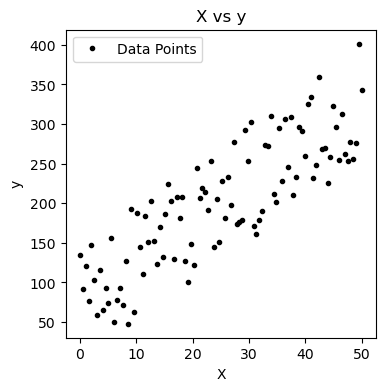

In [265]:
plt.figure(figsize=(4,4))
plt.plot(X,y, "k.", label="Data Points")
# plt.plot(X,4 + 5 * X, "r-", label="Data Points")

plt.xlabel("X")
plt.ylabel("y")
plt.title("X vs y")
plt.legend()
plt.show()


In [266]:
# Fitting the line 
def prediction(w, b , X):
    return b + w * X
def fitLine(X,y, epoch=2000, lr = 0.001):
    w = torch.rand(1,1)
    b = torch.rand(1,1)
    n = X.shape[0]
    for i in range(epoch):
        ypred = prediction(w, b, X)
        loss =(ypred - y)
        dw = (2/n) * torch.sum(loss * X)
        db = (2/n) * torch.sum(loss)
        w = w - lr * (dw)
        b = b - lr * (db)
    return [w, b]

w, b = fitLine(X,y,lr = 0.001)
w,b

(tensor([[5.4705]]), tensor([[56.1918]]))

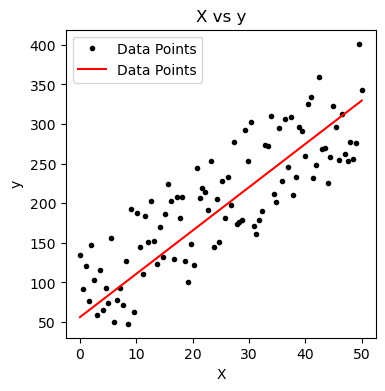

In [267]:
plt.figure(figsize=(4,4))
plt.plot(X,y, "k.", label="Data Points")
plt.plot(X,prediction(w,b, X), "r-", label="Data Points")

plt.xlabel("X")
plt.ylabel("y")
plt.title("X vs y")
plt.legend()
plt.show()

In [268]:
# lr = [1e-04,1e-05,1e-06, 1e-07, 1e-08, 1e-09, 1e-10, 1e-11, 1e-12, 1e-13]
# for i in lr:
#     print(i)
#     w, b = fitLine(X,y,lr = i)
#     plt.figure(figsize=(4,4))
#     plt.plot(X,y, "k.", label="Data Points")
#     plt.plot(X,prediction(w,b, X), "r-", label="Data Points")

#     plt.xlabel("X")
#     plt.ylabel("y")
#     plt.title("X vs y")
#     plt.legend()
#     plt.show()

In [269]:
from sklearn.linear_model import LinearRegression
m = LinearRegression()
m.fit(X,y)
ypred = m.predict(X)

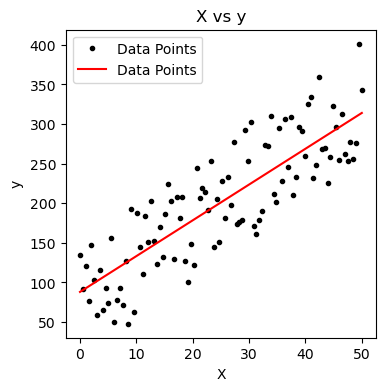

In [270]:
plt.figure(figsize=(4,4))
plt.plot(X,y, "k.", label="Data Points")
plt.plot(X,ypred, "r-", label="Data Points")

plt.xlabel("X")
plt.ylabel("y")
plt.title("X vs y")
plt.legend()
plt.show()

# Train Test split

In [271]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
X_train.shape, y_train.shape

(torch.Size([70, 1]), torch.Size([70, 1]))

In [272]:
from sklearn.linear_model import LinearRegression
m = LinearRegression()
m.fit(X_train,y_train)
ypredtest = m.predict(X_test)
ypredtrain = m.predict(X_train)


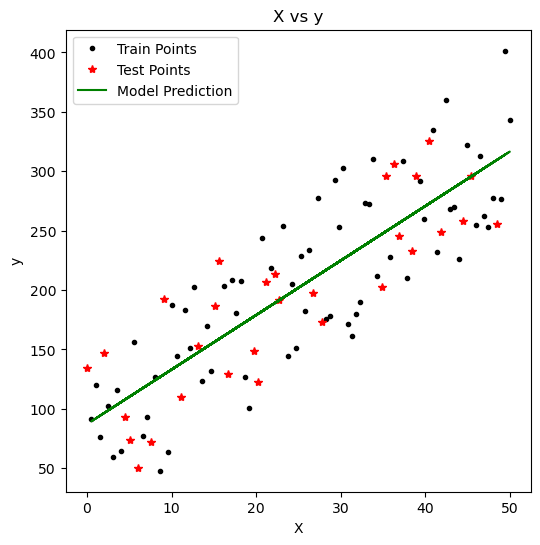

In [273]:
plt.figure(figsize=(6,6))
plt.plot(X_train,y_train, "k.", label="Train Points")
plt.plot(X_test,y_test, "r*", label="Test Points")

plt.plot(X_train,ypredtrain, "g-", label="Model Prediction")

plt.xlabel("X")
plt.ylabel("y")
plt.title("X vs y")
# plt.legend(prop={"size":14})
plt.legend()

plt.show()

# Linear Regression using Pytorch

In [274]:
X_train.shape, y_train.shape

(torch.Size([70, 1]), torch.Size([70, 1]))

In [275]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.w = nn.Parameter(torch.rand(1, requires_grad=True, dtype=torch.float))
        self.b = nn.Parameter(torch.rand(1, requires_grad=True, dtype=torch.float))

    def forward(self, X):
        return self.w * X + self.b 


In [276]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

# List of parametes that we define
print(list(model_0.parameters()))
print((model_0.state_dict()))

[Parameter containing:
tensor([0.8823], requires_grad=True), Parameter containing:
tensor([0.9150], requires_grad=True)]
OrderedDict({'w': tensor([0.8823]), 'b': tensor([0.9150])})


In [277]:
# to get the parametres
for key, value in model_0.state_dict().items():
    print(key, value)


w tensor([0.8823])
b tensor([0.9150])


In [278]:
# Making predictionms with model
with torch.inference_mode():
    y_pred_test = model_0(X_test)
    y_pred_train = model_0(X_train)


# y_pred

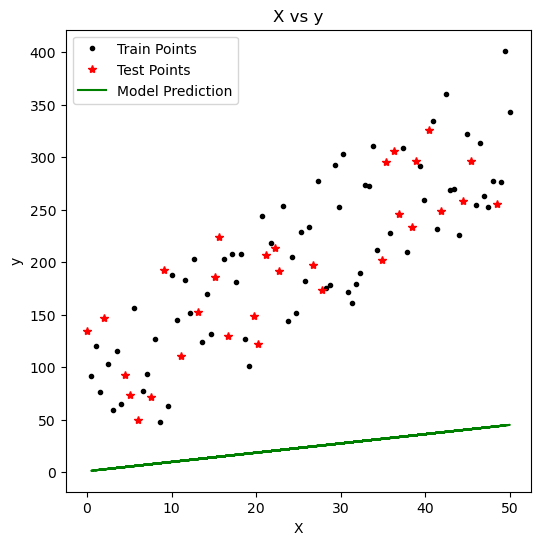

In [279]:
plt.figure(figsize=(6,6))
plt.plot(X_train,y_train, "k.", label="Train Points")
plt.plot(X_test,y_test, "r*", label="Test Points")

plt.plot(X_train,y_pred_train, "g-", label="Model Prediction")

plt.xlabel("X")
plt.ylabel("y")
plt.title("X vs y")
# plt.legend(prop={"size":14})
plt.legend()

plt.show()

# Loss Functions and Optimizer

In [280]:
model_0.state_dict()

OrderedDict([('w', tensor([0.8823])), ('b', tensor([0.9150]))])

In [281]:
# setup a loss fiunciton
# loss_fn = nn.L1Loss()
loss_fn = nn.MSELoss()

# setup the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.001)


# Building a training loops (forward pass)

In [282]:
epoch = 5000
for i in range(epoch):
    model_0.train()
    # forward pass
    y_pred = model_0(X_train)
    # calculate the loss
    loss = loss_fn(y_pred, y_train)
    # optimizer
    optimizer.zero_grad()
    # perform backlpropagtion on the loss
    loss.backward()
    #  perform optimizer 
    optimizer.step()

    model_0.eval()
    if(i % 1000 == 0):
        print(f"Epoch :: {i}/{epoch} Loss :: {loss.item():.4f}")

model_0.eval() # turn off diffrent setting in pytorch evaluation/testin

Epoch :: 0/5000 Loss :: 37698.7422
Epoch :: 1000/5000 Loss :: 2660.3286
Epoch :: 2000/5000 Loss :: 2233.9900
Epoch :: 3000/5000 Loss :: 2074.3945
Epoch :: 4000/5000 Loss :: 2014.6511


LinearRegressionModel()

In [283]:
# Making predictionms with model
with torch.inference_mode(): # turn of gradient tracking and more things
    # forward pass
    y_pred_test = model_0(X_test)
    y_pred_train = model_0(X_train)
# y_pred

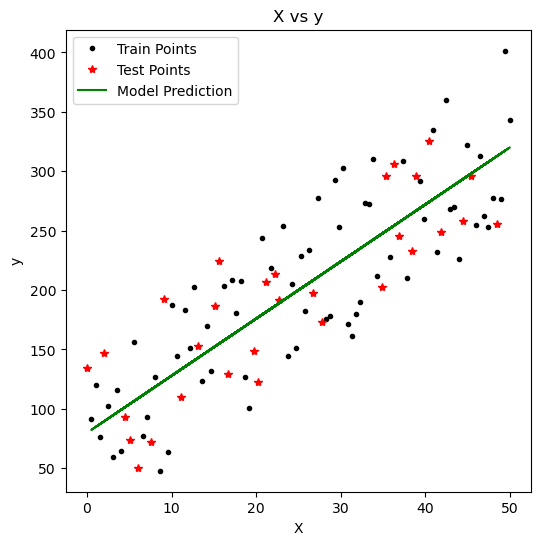

In [284]:
plt.figure(figsize=(6,6))
plt.plot(X_train,y_train, "k.", label="Train Points")
plt.plot(X_test,y_test, "r*", label="Test Points")

plt.plot(X_train,y_pred_train, "g-", label="Model Prediction")

plt.xlabel("X")
plt.ylabel("y")
plt.title("X vs y")
# plt.legend(prop={"size":14})
plt.legend()

plt.show()

In [285]:
statec_dict = dict(model_0.state_dict())
print("Dict of weight", statec_dict)
print("W = ", statec_dict["w"])
print("b = ", statec_dict["b"] )

Dict of weight {'w': tensor([4.8044]), 'b': tensor([79.7772])}
W =  tensor([4.8044])
b =  tensor([79.7772])


# Save and Load Model using pytorch

1 . `torch.save()` -> in pkl format (th pickle module implements binary protocols for serializing (save) and deserilizing (load) a pytohn object sturucture).

2 . `torch.load()` -> allows to load a savve pkl format object

3 . `torch.nn.Module.load_state_dict()` -> allows to load model's save state_dict

`model_0.state_dict()`

In [286]:
model_0.state_dict() # state dictionary till now modlue parameters

OrderedDict([('w', tensor([4.8044])), ('b', tensor([79.7772]))])

`save model by creating path`

In [287]:
# saving out pytotrch model
from pathlib import Path
print("CWD :: ", Path.cwd())

# create model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# create mdoel save path
MODEL_NAME = "01_Pytoch_workflow_model.pth" # pytorch extension for object is .pt otr .pth to save model
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
print("Saving model to path :: ", MODEL_SAVE_PATH)

# save the model state dict
torch.save(obj = model_0.state_dict(), f = MODEL_SAVE_PATH)

CWD ::  d:\2_Code\10_ArtificialIntelligence\1_DeepLearning\1_DeepLearning_HandsOn_Pytorch
Saving model to path ::  models\01_Pytoch_workflow_model.pth


`checking using windows command`

In [288]:
# command to run using the python (linux or windows command)
!dir models

 Volume in drive D is Extra Space
 Volume Serial Number is E6AB-2A35

 Directory of d:\2_Code\10_ArtificialIntelligence\1_DeepLearning\1_DeepLearning_HandsOn_Pytorch\models

17-01-2025  12:34    <DIR>          .
17-01-2025  12:32    <DIR>          ..
17-01-2025  14:00             1,662 01_Pytoch_workflow_model.pth
               1 File(s)          1,662 bytes
               2 Dir(s)  23,646,175,232 bytes free


`torch.load()` -> to load the pytorch saved model (.pth ot .pt) `OR` to load the save model's state_dict

In [289]:
# to load in saved state_dict we have to instanstiate a new instance of our model class
load_model_0 =LinearRegressionModel()
print(load_model_0.state_dict()) # randomly assigned values of w and b
# LOAD THE saved state_dict of saved model 
load_model_0.load_state_dict(torch.load(f = MODEL_SAVE_PATH))

OrderedDict({'w': tensor([0.3829]), 'b': tensor([0.9593])})


C:\Users\sande\AppData\Local\Temp\ipykernel_16980\2599932935.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  load_model_0.load_state_dict(torch.load(f = MODEL_SAVE_PATH)

<All keys matched successfully>

In [292]:
load_model_0.state_dict()

OrderedDict([('w', tensor([4.8044])), ('b', tensor([79.7772]))])

In [296]:
with torch.inference_mode(): # turn of gradient tracking and more things
    # forward pass
    y_pred_model = model_0(X_test)
    y_pred_load = load_model_0(X_test)
    
# y_pred_load - y_pred_model # we get all values as 0 means our model is save and load succesfully